# Exploratory Data Analysis (EDA) – Uber Taxi Fare Prediction
In this notebook, we explore the Uber taxi fare dataset, check data quality, analyze distributions, and prepare the dataset for feature engineering and modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
file_path = r"C:\Users\USER\OneDrive\Belgeler\uber.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
print("First 5 rows:")
display(df.head())
print("\ndDataFrame info:")
df.info()
print("\nSummary statistics:")
display(df.describe())
print("\nColumns:")
print(df.columns.tolist())

First 5 rows:


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



dDataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Summary statistics:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000



Columns:
['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [4]:
missing_count=df.isnull().sum()
print("missing values per column:")
display(missing_count)
missing_percent=(df.isnull().sum()/len(df))*100
print("\nmissing values percentage:")
display(missing_percent.sort_values(ascending=False))

missing values per column:


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


missing values percentage:


dropoff_longitude    0.0005
dropoff_latitude     0.0005
Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
passenger_count      0.0000
dtype: float64

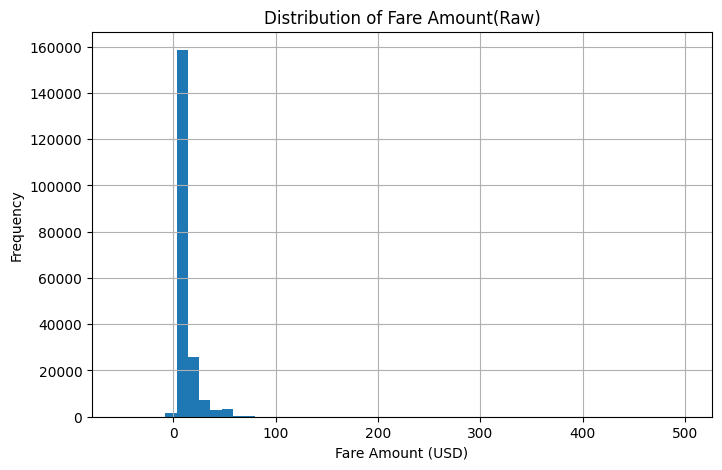

In [6]:
plt.figure(figsize=(8,5))
df['fare_amount'].hist(bins=50)
plt.title("Distribution of Fare Amount(Raw)")
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Frequency")
plt.show()

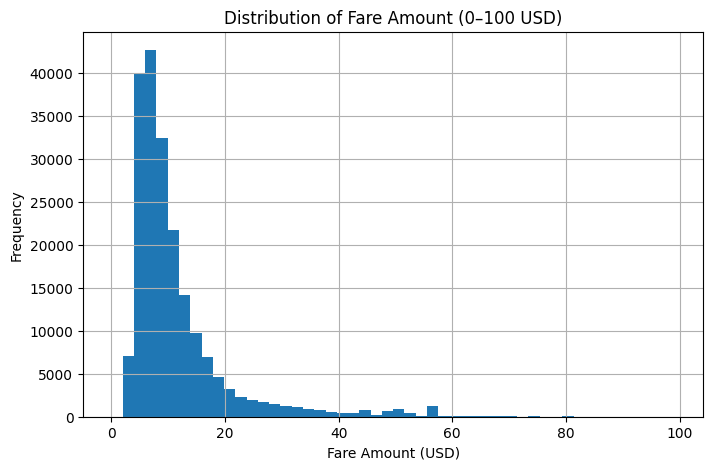

In [7]:
# Filter unrealistic fares for better visualization
df_fare_filtered = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]

plt.figure(figsize=(8, 5))
df_fare_filtered['fare_amount'].hist(bins=50)
plt.title("Distribution of Fare Amount (0–100 USD)")
plt.xlabel("Fare Amount (USD)")
plt.ylabel("Frequency")
plt.show()


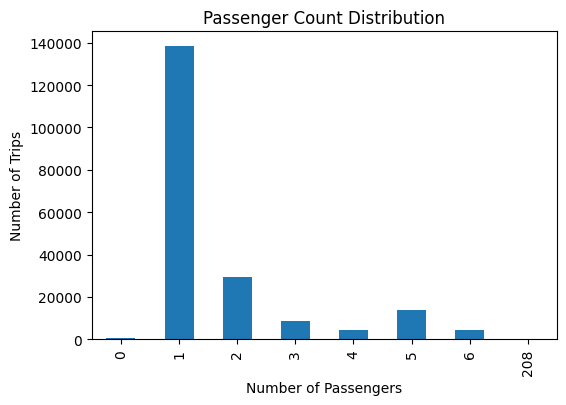

Unique passenger_count values: [  1   3   5   2   4   6   0 208]


In [8]:
plt.figure(figsize=(6, 4))
df['passenger_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Passenger Count Distribution")
plt.xlabel("Number of Passengers")
plt.ylabel("Number of Trips")
plt.show()
print("Unique passenger_count values:", df['passenger_count'].unique())

In [9]:
print("pickup_datetime sample values:")
print(df['pickup_datetime'].head())
print("Type before conversion:", df['pickup_datetime'].dtype)

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

print("\nType after conversion:", df['pickup_datetime'].dtype)
print(df['pickup_datetime'].head())

pickup_datetime sample values:
0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object
Type before conversion: object

Type after conversion: datetime64[ns, UTC]
0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]


In [10]:
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday  # Monday = 0

df[['pickup_datetime', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_weekday']].head()

,pickup_datetime,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday
0,2015-05-07 19:52:06+00:00,2015,5,7,19,3
1,2009-07-17 20:04:56+00:00,2009,7,17,20,4
2,2009-08-24 21:45:00+00:00,2009,8,24,21,0
3,2009-06-26 08:22:21+00:00,2009,6,26,8,4
4,2014-08-28 17:47:00+00:00,2014,8,28,17,3


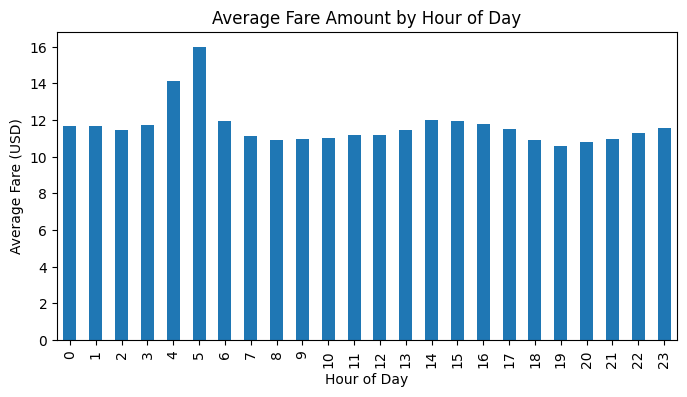

In [11]:

hourly_fare = df.groupby('pickup_hour')['fare_amount'].mean()

plt.figure(figsize=(8, 4))
hourly_fare.plot(kind='bar')
plt.title("Average Fare Amount by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare (USD)")
plt.show()


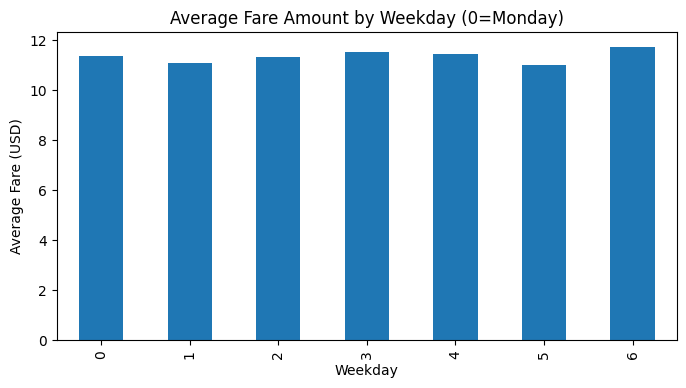

In [12]:
# Average fare by weekday
weekday_fare = df.groupby('pickup_weekday')['fare_amount'].mean()

plt.figure(figsize=(8, 4))
weekday_fare.plot(kind='bar')
plt.title("Average Fare Amount by Weekday (0=Monday)")
plt.xlabel("Weekday")
plt.ylabel("Average Fare (USD)")
plt.show()


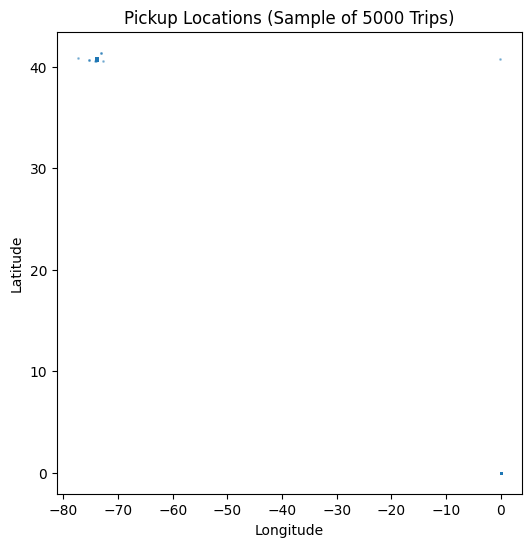

In [14]:
sample_size = min(5000, len(df))
sample_df = df.sample(sample_size, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(sample_df['pickup_longitude'], sample_df['pickup_latitude'],
            s=1, alpha=0.4)
plt.title(f"Pickup Locations (Sample of {sample_size} Trips)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
df.to_csv("uber_eda_output.csv", index=False)
print("Dataset saved as uber_eda_output.csv")